In [8]:
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv('../processed_data/merged_data_2013-2022.csv')
df = df.drop(columns=["Unnamed: 0"])

In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"Counties: {df['county'].nunique()}")
print(f"Years: {df['year'].unique()}")
print(f"\nMissing values: {df.isnull().sum()}")

In [ ]:
worst_aqi = df.groupby('county')['median_aqi'].mean().sort_values(ascending=False).head(10)
print("Counties with highest median AQI:")
print(worst_aqi)

# 2. Which counties have highest asthma rates?
highest_asthma = df.groupby('county')['asthma_rate'].mean().sort_values(ascending=False).head(10)
print("Counties with highest astham rates:")
print(highest_asthma)

In [9]:
# 3. What's the correlation? (pearson's correlation coefficient)
correlation = df['median_aqi'].corr(df['asthma_rate'])
print(f"Correlation between AQI and Asthma rates: {correlation:.3f}")

# 4. Statistical significance (linear regression on the data)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['median_aqi'], df['asthma_rate'])
print(f"R-squared: {r_value**2:.3f}, P-value: {p_value:.3f}")

Correlation between AQI and Asthma rates: 0.110
R-squared: 0.012, P-value: 0.011


In [4]:
import statsmodels.formula.api as smf

# "only aqi matters" ~ simple regression
# 3) Fit an OLS model: asthma_rate ~ median_aqi
model = smf.ols("asthma_rate ~ median_aqi", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            asthma_rate   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.446
Date:                Mon, 23 Jun 2025   Prob (F-statistic):             0.0114
Time:                        18:22:33   Log-Likelihood:                -2225.4
No. Observations:                 529   AIC:                             4455.
Df Residuals:                     527   BIC:                             4463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3234      2.554     14.221      0.0

In [3]:
import statsmodels.formula.api as smf

mod = smf.ols('asthma_rate ~ median_aqi + C(county) + C(year)', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            asthma_rate   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     52.90
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          6.40e-174
Time:                        18:22:28   Log-Likelihood:                -1677.4
No. Observations:                 529   AIC:                             3481.
Df Residuals:                     466   BIC:                             3750.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       45.8562      3.917     11.706      0.000      38.159      53.554
C(county)[T.Amador]              5.4041      2.882      1.875      0.061      -0.259      11.068
C(county)[T.Butte]             -11.2520      2.751     -4.090      0.000     -16.657      -5.847
C(county)[T.Calaveras]          -0.9634      2.760     -0.349      0.727      -6.387       4.460
C(county)[T.Colusa]            -10.1819      2.770     -3.676      0.000     -15.625      -4.739
C(county)[T.Contra Costa]        3.4170      2.753      1.241      0.215      -1.992       8.826
C(county)[T.Del Norte]           6.9385      3.170      2.189      0.029       0.710      13.167
C(county)[T.El Dorado]         -14.9365      2.799     -5.336      0.000     -20.437      -9.436
C(county)[T.Fresno]              7.7885      3.055      2.549      0.011       1.785      13.792
C(county)[T.Glenn]             -10.6532      2.795     -3.812      0.000     -16.145      -5.161
C(county)[T.Humboldt]            8.2659      2.937      2.814      0.005       2.495      14.037
C(county)[T.Imperial]            4.0930      2.803      1.460      0.145      -1.415       9.601
C(county)[T.Inyo]                1.7316      2.750      0.630      0.529      -3.673       7.136
C(county)[T.Kern]               -8.7124      3.295     -2.644      0.008     -15.188      -2.237
C(county)[T.Kings]               5.8205      2.920      1.993      0.047       0.082      11.559
C(county)[T.Lake]               25.5887      2.986      8.570      0.000      19.721      31.456
C(county)[T.Los Angeles]       -10.0336      3.138     -3.198      0.001     -16.199      -3.868
C(county)[T.Madera]             -0.3764      2.793     -0.135      0.893      -5.864       5.111
C(county)[T.Marin]             -25.4448      2.827     -8.999      0.000     -31.001     -19.889
C(county)[T.Mariposa]          -12.1979      2.751     -4.434      0.000     -17.604      -6.792
C(county)[T.Mendocino]           7.5652      2.819      2.683      0.008       2.025      13.105
C(county)[T.Merced]             15.0526      2.759      5.455      0.000       9.630      20.475
C(county)[T.Mono]               -7.4101      3.212     -2.307      0.022     -13.722      -1.098
C(county)[T.Monterey]           -8.2250      2.851     -2.884      0.004     -13.828      -2.622
C(county)[T.Napa]              -13.6074      2.851     -4.773      0.000     -19.210      -8.005
C(county)[T.Nevada]            -16.3990      2.769     -5.922      0.000     -21.840     -10.958
C(county)[T.Orange]            -23.1699      2.758     -8.402      0.000     -28.589     -17.751
C(county)[T.Placer]            -21.0056      2.748     -7.645      0.000     -26.405     -15.606
C(county)[T.Plumas]              0.2246      2.750      0.082      0.935    

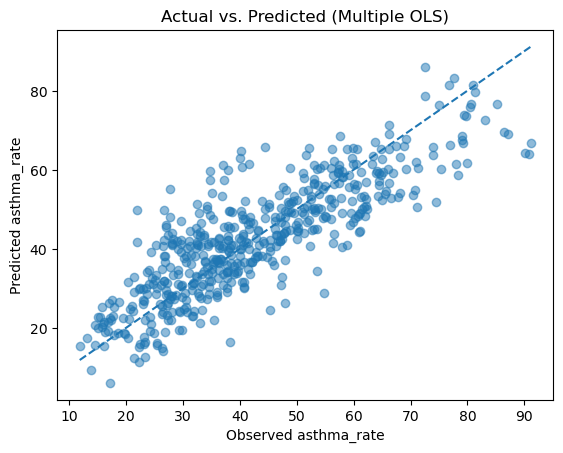

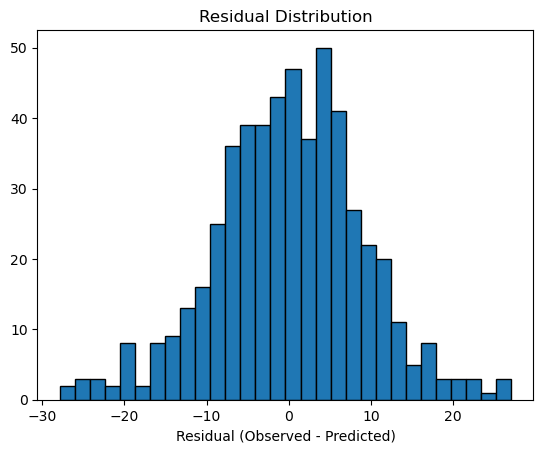

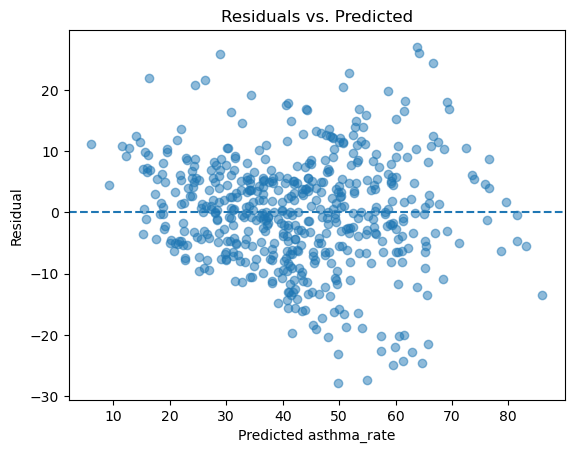

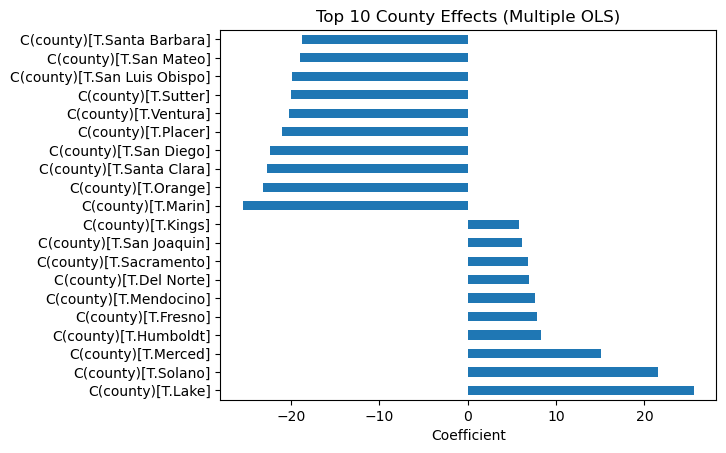

In [6]:
import matplotlib.pyplot as plt

# 4A. Actual vs. Predicted
plt.figure()
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--')
plt.xlabel('Observed asthma_rate')
plt.ylabel('Predicted asthma_rate')
plt.title('Actual vs. Predicted (Multiple OLS)')
plt.show()

# 4B. Residual Histogram
residuals = y - y_pred
plt.figure()
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual (Observed - Predicted)')
plt.title('Residual Distribution')
plt.show()

# 4C. Residuals vs. Predicted
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted asthma_rate')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted')
plt.show()

# 4D. Top County Effects
import statsmodels.formula.api as smf
mod = smf.ols('asthma_rate ~ median_aqi + C(county) + C(year)', data=df).fit()
coefs = mod.params.filter(like='C(county)')
top_pos = coefs.sort_values(ascending=False).head(10)
top_neg = coefs.sort_values().head(10)
plot_coefs = pd.concat([top_pos, top_neg])

plt.figure()
plot_coefs.plot(kind='barh')
plt.xlabel('Coefficient')
plt.title('Top 10 County Effects (Multiple OLS)')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

# 1. Load and prepare the data (adjust path if needed)
df = pd.read_csv('../processed_data/merged_data_2013-2022.csv')
X = pd.get_dummies(df[['median_aqi', 'county', 'year']], drop_first=True)
y = df['asthma_rate']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Ridge Regression with cross-validated alpha
alphas = np.logspace(-3, 3, 13)
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_preds))

# 4. Lasso Regression with cross-validated alpha
lasso_cv = LassoCV(cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
lasso_preds = lasso_cv.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_preds))

# 5. Output results
print(f"Ridge best alpha: {ridge_cv.alpha_}")
print(f"Ridge Test RMSE: {rmse_ridge:.3f}")
print(f"Lasso best alpha: {lasso_cv.alpha_:.5f}")
print(f"Lasso Test RMSE: {rmse_lasso:.3f}")

In [ ]:
# Create meaningful features
df['total_unhealthy_days'] = (df['unhealthy_for_sensitive_groups_days'] + 
                              df['unhealthy_days'] + 
                              df['very_unhealthy_days'] + 
                              df['hazardous_days'])

df['percent_good_days'] = (df['good_days'] / df['days_with_aqi']) * 100
df['percent_unhealthy_days'] = (df['total_unhealthy_days'] / df['days_with_aqi']) * 100

# Air quality severity categories
df['aqi_category'] = pd.cut(df['median_aqi'], 
                           bins=[0, 50, 100, 150, 200, float('inf')],
                           labels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy'])

# High asthma rate binary target (for logistic regression)
asthma_threshold = df['asthma_rate'].quantile(0.75)  # Top 25% of asthma rate per 10,000
df['high_asthma'] = (df['asthma_rate'] > asthma_threshold).astype(int)

#print(f"High asthma threshold: {asthma_threshold:.1f} cases per 10k")
#print(f"Counties with high asthma rates: {df['high_asthma'].sum()}")

In [ ]:
# 3. County and temporal patterns
county_stats = df.groupby('county').agg({
    'median_aqi': 'mean',
    'asthma_rate': 'mean',
    'total_unhealthy_days': 'mean'
}).sort_values('asthma_rate', ascending=False)

print("\nTop 10 counties by asthma rate:")
print(county_stats.head(10))

In [ ]:
from scipy import stats

# 1. Which counties have the worst air quality?
worst_aqi = df.groupby('county')['median_aqi'].mean().sort_values(ascending=False).head(10)
print("Counties with highest median AQI:")
print(worst_aqi)

# 2. Which counties have highest asthma rates?
high_asthma = df.groupby('county')['asthma_rate'].mean().sort_values(ascending=False).head(10)

# 3. What's the correlation? (pearson's correlation coefficient)
correlation = df['median_aqi'].corr(df['asthma_rate'])
print(f"Correlation between AQI and Asthma rates: {correlation:.3f}")

# 4. Statistical significance (linear regression on the data)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['median_aqi'], df['asthma_rate'])
print(f"R-squared: {r_value**2:.3f}, P-value: {p_value:.3f}")

In [ ]:
import matplotlib.pyplot as plt

# Top/bottom counties
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
worst_aqi.head(10).plot(kind='barh', ax=ax1, title='Worst Air Quality Counties')
high_asthma.head(10).plot(kind='barh', ax=ax2, title='Highest Asthma Rate Counties')
plt.tight_layout()
plt.show()

# Time trends
yearly_trends = df.groupby('year')[['median_aqi', 'asthma_rate']].mean()
yearly_trends.plot(kind='line', figsize=(12, 6))
plt.title('California Air Quality and Asthma Trends Over Time')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['median_aqi'], df['asthma_rate'], alpha=0.6)
plt.xlabel('Median AQI')
plt.ylabel('Asthma ED Rate per 100k')
plt.title('Air Quality vs Asthma Emergency Department Visits')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['median_aqi'], df['asthma_rate'], c=df['year'])
plt.xlabel('Median AQI')
plt.ylabel('Asthma ED rate')
plt.title('AQI vs. Asthma (2017–2021)')
plt.colorbar(label='Year')
plt.show()